## Анализ набора данных с использованием `pandas` (2)

In [13]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
df = pd.read_csv('Employee.csv')

Постройте столбчатую диаграмму, показывающую количество сотрудников в каждой категории образования (Education).

<Axes: xlabel='Education'>

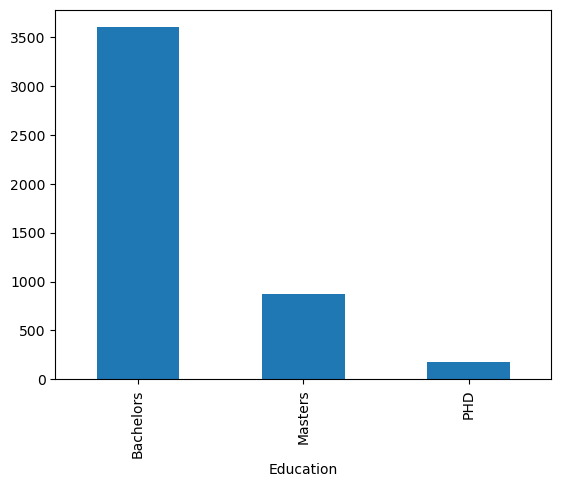

In [3]:
df.groupby('Education').size().plot(kind='bar')

<Axes: xlabel='Education', ylabel='count'>

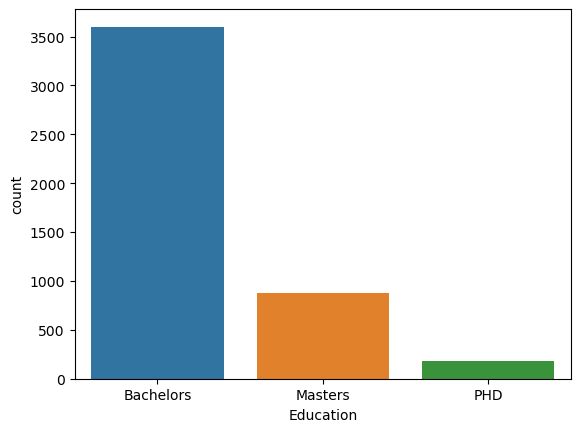

In [5]:
sb.countplot(data=df, x="Education")

<Axes: xlabel='Education'>

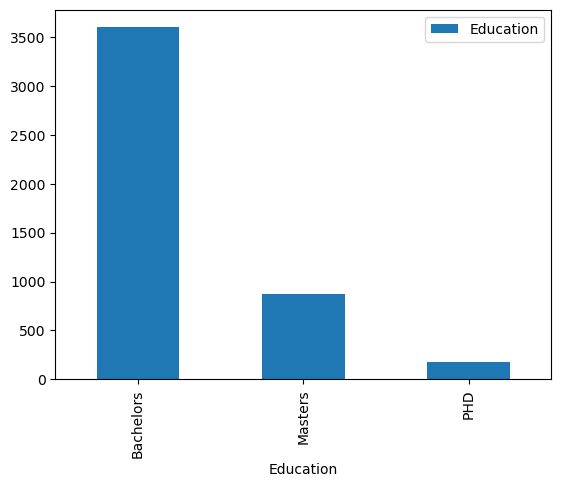

In [7]:
data=df.groupby("Education").agg({"Education" : "count"})
data.plot(kind='bar')

<Axes: >

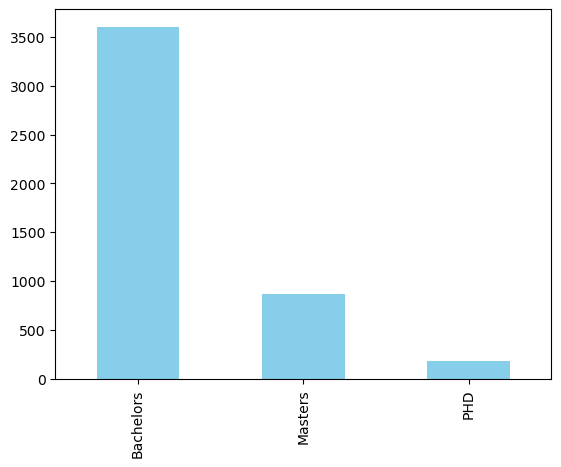

In [8]:
df['Education'].value_counts().plot(kind='bar', color='skyblue')

Создайте круговую диаграмму, отображающую процентное соотношение мужчин и женщин среди сотрудников.

<Axes: ylabel='None'>

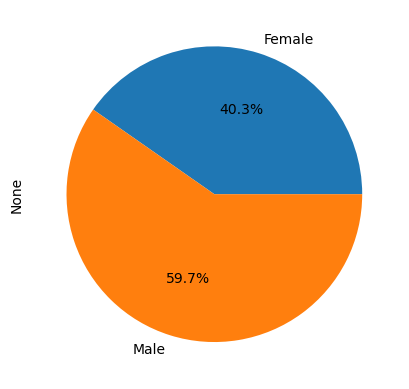

In [9]:
df.groupby('Gender').size().plot(kind='pie', autopct='%1.1f%%')

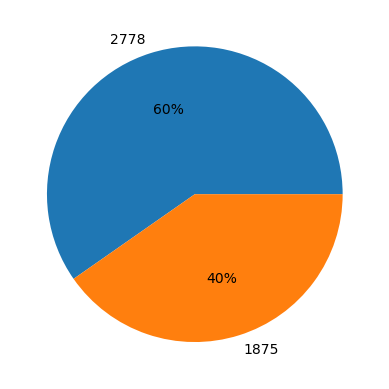

In [14]:
men_count = 0
female_count = 0
for item in df["Gender"]:
    if item == "Male":
        men_count += 1
    else:
        female_count += 1
plt.pie([men_count,female_count], labels=[men_count,female_count],autopct='%.0f%%')
plt.show()

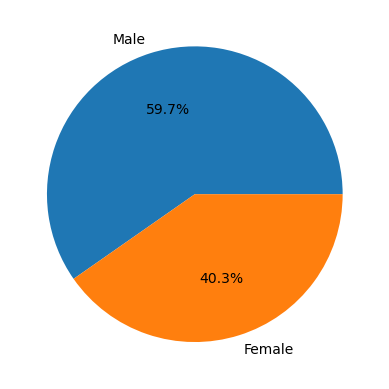

In [16]:
df1 = df['Gender'].value_counts()
plt.pie(df1, labels=df1.index, autopct='%1.1f%%') 
plt.show()

Постройте линейный график, отображающий изменение среднего возраста сотрудников по годам присоединения к компании (JoiningYear).

<Axes: xlabel='JoiningYear'>

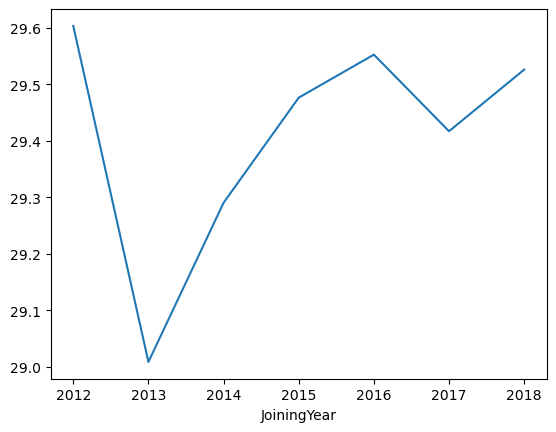

In [17]:
df.groupby('JoiningYear')['Age'].mean().plot()

<Axes: xlabel='JoiningYear', ylabel='Age'>

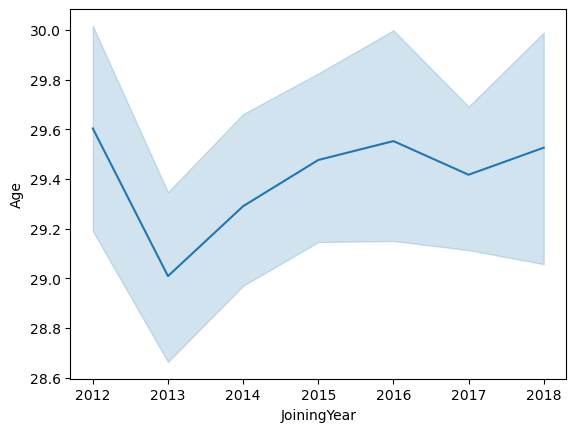

In [18]:
sb.lineplot(df, x = df["JoiningYear"], y=df["Age"])

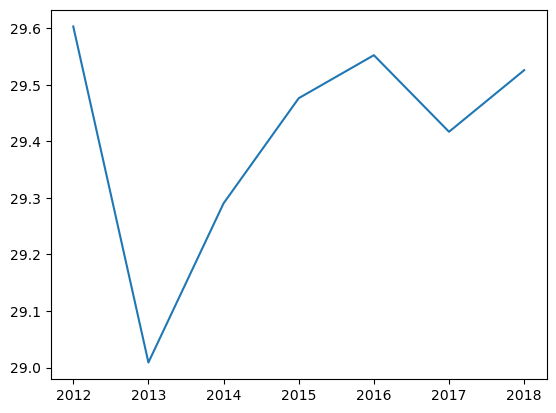

In [19]:
df2 = df.groupby('JoiningYear')['Age'].mean()

plt.plot(df2.index, df2.values)

plt.show()

Нарисуй ящик с усами для переменной опыта в текущей области (ExperienceInCurrentDomain) с разбивкой по уровню оплаты (PaymentTier).

<Axes: xlabel='PaymentTier', ylabel='ExperienceInCurrentDomain'>

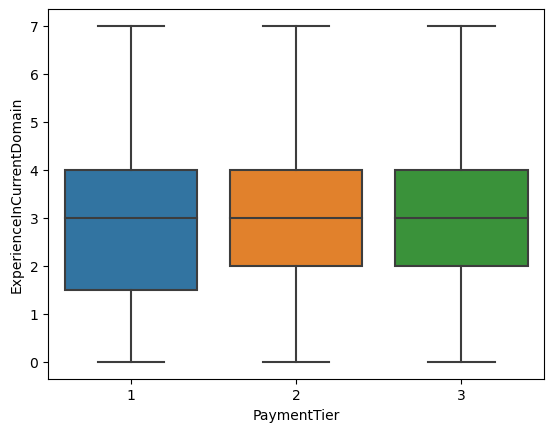

In [21]:
sb.boxplot(df, x='PaymentTier', y='ExperienceInCurrentDomain')

<Axes: xlabel='ExperienceInCurrentDomain', ylabel='PaymentTier'>

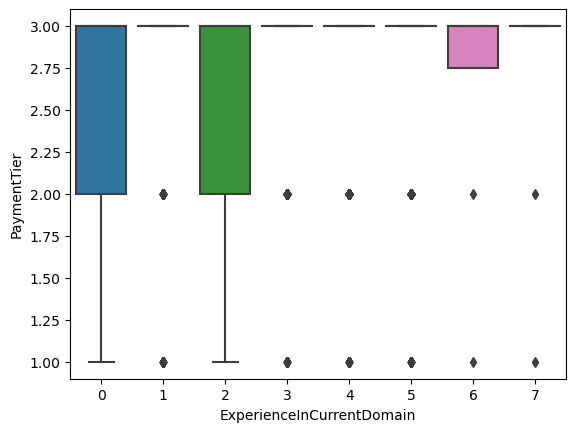

In [22]:
sb.boxplot(df, x=df["ExperienceInCurrentDomain"], y=df["PaymentTier"])

Постройте два столбчатых графика рядом друг с другом: на одном отобрази количество сотрудников с опытом работы в текущей области более 3 лет, а на другом - количество сотрудников с опытом менее 3 лет, разбив по полу.

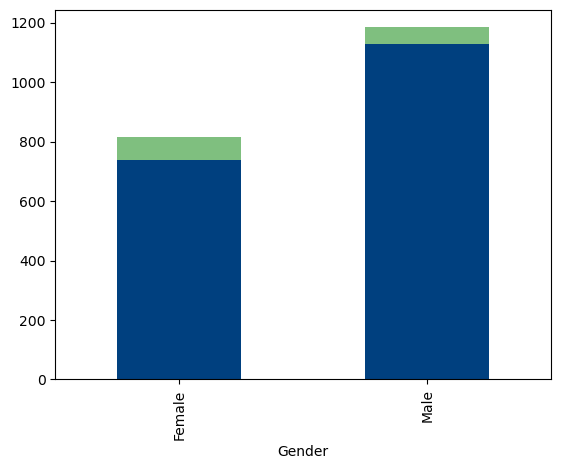

In [23]:
df[df['ExperienceInCurrentDomain'] > 3].groupby('Gender').size().plot(kind='bar', color='blue')
df[df['ExperienceInCurrentDomain'] < 3].groupby('Gender').size().plot(kind='bar', color='green', alpha=0.5)
plt.show()

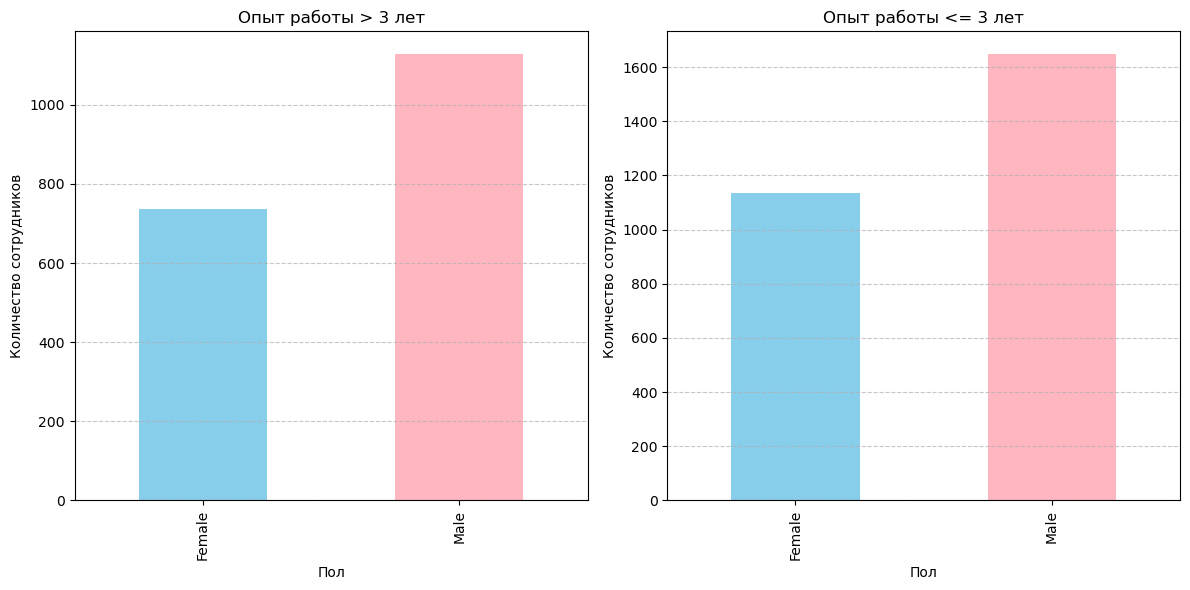

In [25]:
exp_over_3 = df[df['ExperienceInCurrentDomain'] > 3]

exp_under_3 = df[df['ExperienceInCurrentDomain'] <= 3]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

exp_over_3.groupby('Gender').size().plot(kind='bar', ax=axes[0], color=['skyblue', 'lightpink'])
axes[0].set_title('Опыт работы > 3 лет')
axes[0].set_xlabel('Пол')
axes[0].set_ylabel('Количество сотрудников')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

exp_under_3.groupby('Gender').size().plot(kind='bar', ax=axes[1], color=['skyblue', 'lightpink'])
axes[1].set_title('Опыт работы <= 3 лет')
axes[1].set_xlabel('Пол')
axes[1].set_ylabel('Количество сотрудников')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Создайте scatter plot, где по оси X будет опыт работы в текущей области, а по оси Y - возраст сотрудников. Разными цветами обозначь мужчин и женщин.

<Axes: xlabel='ExperienceInCurrentDomain', ylabel='Age'>

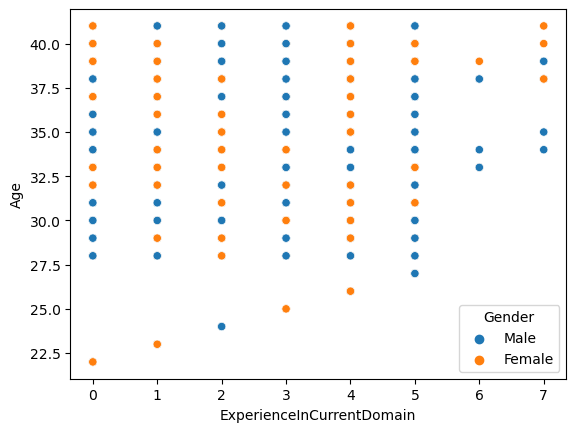

In [26]:
sb.scatterplot(df, x='ExperienceInCurrentDomain', y='Age', hue='Gender')

<Axes: xlabel='ExperienceInCurrentDomain', ylabel='Age'>

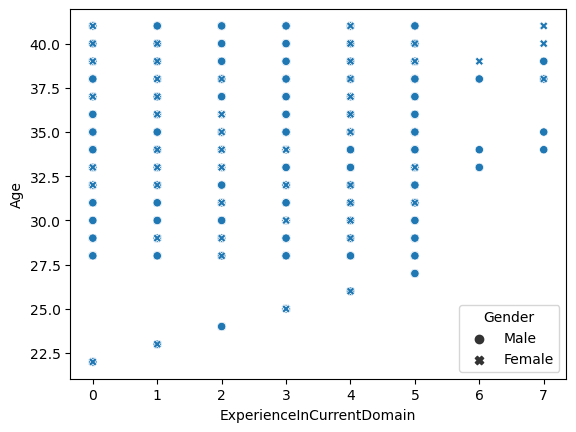

In [27]:
sb.scatterplot(df, x=df["ExperienceInCurrentDomain"], y = df["Age"], style="Gender")

Постройте гистограмму распределения возраста среди сотрудников с разбивкой на три группы по уровню оплаты (PaymentTier).

<Axes: xlabel='Age', ylabel='Count'>

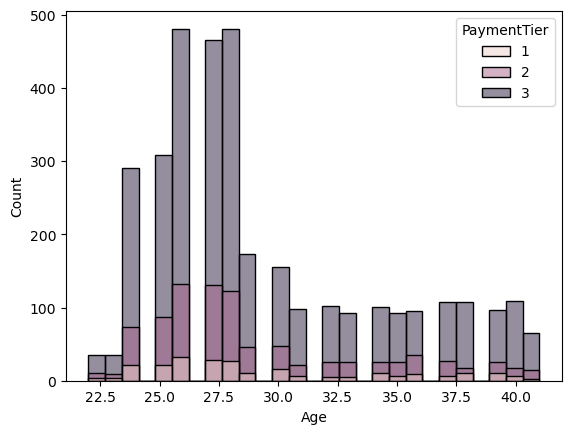

In [29]:
sb.histplot(df, x='Age', hue='PaymentTier')

Нарисуйте два подграфика (subplot): на первом покажи гистограмму распределения возраста для женщин, на втором - для мужчин.

<Axes: xlabel='Age', ylabel='Count'>

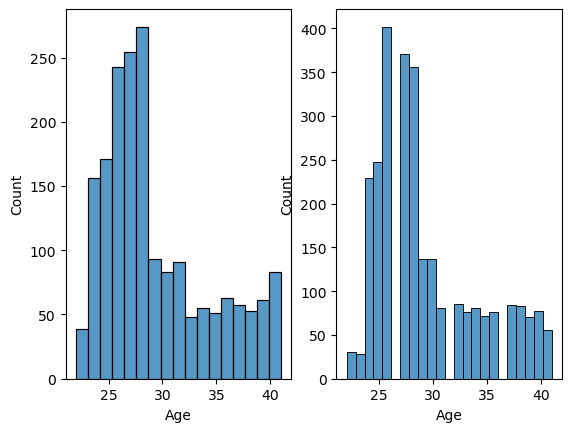

In [31]:
fig, axs = plt.subplots(nrows=1, ncols=2)
sb.histplot(df[df['Gender'] == 'Male'], x='Age', ax=axs[1])
sb.histplot(df[df['Gender'] == 'Female'], x='Age', ax=axs[0])

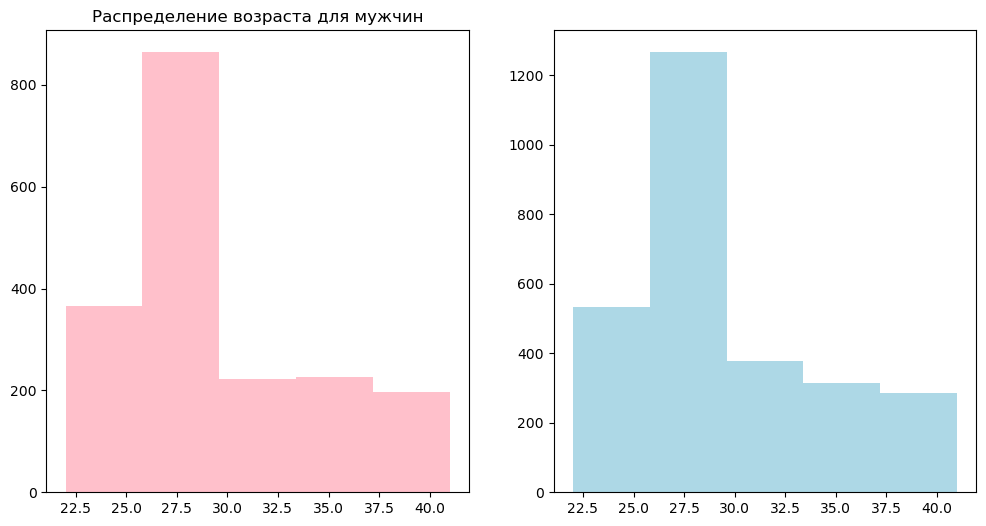

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# женщины
female_data = df[df['Gender'] == 'Female']
axes[0].hist(female_data['Age'], bins=5, color='pink')
axes[0].set_title('Распределение возраста для женщин')

# мужчины
male_data = df[df['Gender'] == 'Male']
axes[1].hist(male_data['Age'], bins=5, color='lightblue')
axes[0].set_title('Распределение возраста для мужчин')

plt.show()

Постройте столбчатую диаграмму, показывающую количество сотрудников, которые были отстранены от проектов на месяц или более (EverBenched), разбив по городам (City).

<Axes: xlabel='City'>

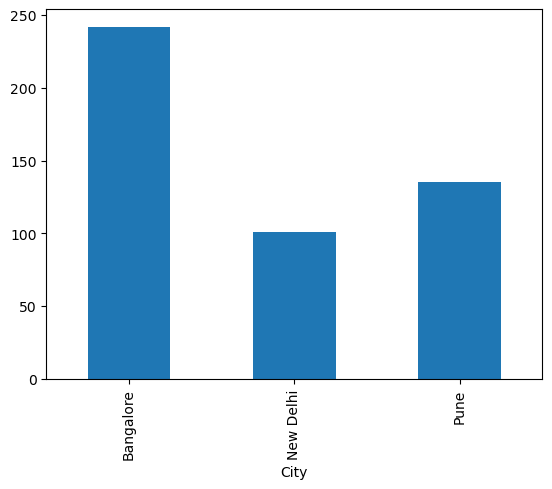

In [33]:
df[df['EverBenched'] == 'Yes'].groupby('City').size().plot(kind='bar')

<Axes: xlabel='City', ylabel='Count'>

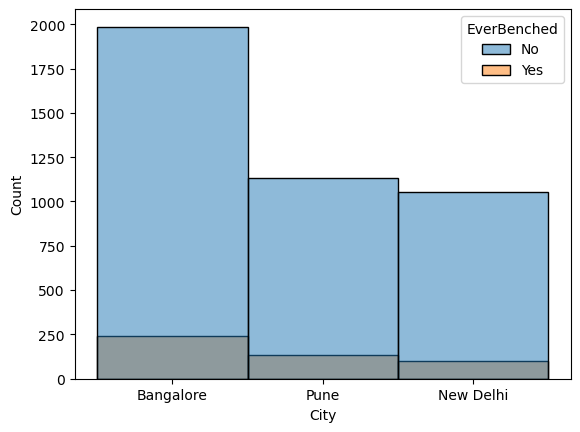

In [34]:
sb.histplot(df,x="City",hue="EverBenched")

Создайте box plot для переменной возраста (Age) с разбивкой на группы по тому, оставят сотрудника или нет (LeaveOrNot).

<Axes: xlabel='LeaveOrNot', ylabel='Age'>

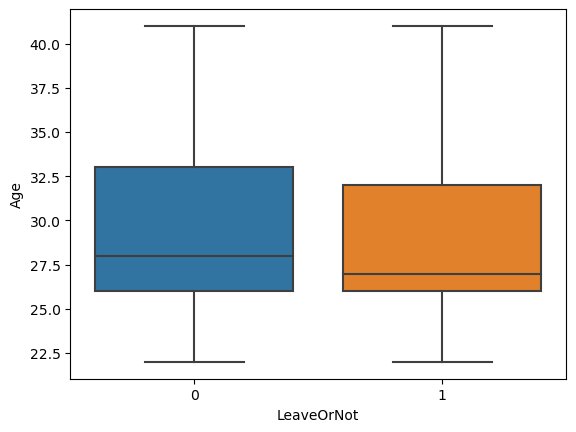

In [35]:
sb.boxplot(df, y='Age', x='LeaveOrNot')

<Axes: xlabel='LeaveOrNot', ylabel='Age'>

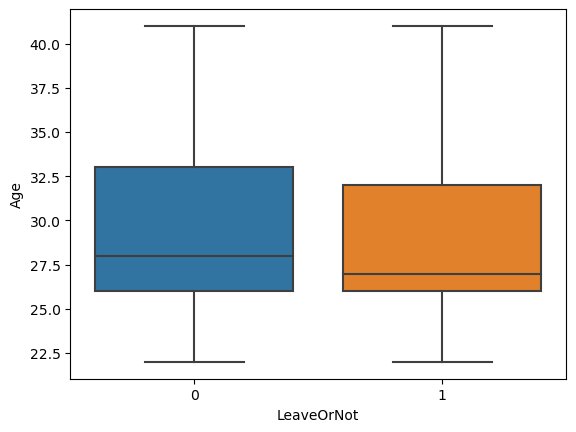

In [36]:
sb.boxplot(df, x=df["LeaveOrNot"], y=df["Age"])